<a href="https://colab.research.google.com/github/Het0c/Ep4Machine/blob/main/Arbol_de_desicion_csgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn import tree

import os
from google.colab import files

# Cargar datos

if not os.path.exists("csgo_Final.csv"):
  uploaded = files.upload()

df = pd.read_csv("csgo_Final.csv", sep=",")

df.head()


Saving csgo_Final.csv to csgo_Final.csv


/tmp/ipython-input-1-2911425279.py:19: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_Final.csv", sep=",")


,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


# Division

In [5]:
# Filtrar solo las partidas sin errores:
df_clean = df[df["AbnormalMatch"] == False].copy()

# Definir las variables predictoras y el target
features = [
    'RoundKills',
    'RoundDeaths',
    'KDR',
    'TeamStartingEquipmentValue',
    'Map',
    'Team'
]
target = "RoundWinner"

# Filtramos el DataFrame para quedarnos solo con filas donde 'RoundWinner' tenga valores válidos ('True' o 'False')
df_clean = df_clean[df_clean['RoundWinner'].isin(['True', 'False'])]

#Vector "X"
X = df_clean[features]
X = pd.get_dummies(X, columns=['Map', 'Team'])

#vector objetivo "Y" reemplazo de booleanos a binarios
y = df_clean[target].replace({'True': 1, 'False': 0}).astype(int)

#verificacion
print(X.head())
print("__________________________________________________")
print(y.head())
print("__________________________________________________")
print(features , target)
print("__________________________________________________")

   RoundKills  RoundDeaths  KDR  TeamStartingEquipmentValue  Map_de_dust2  \
0           0            1  0.0                        4400         False   
1           0            1  0.0                        4400         False   
2           0            1  0.0                        4400         False   
3           0            1  0.0                        4400         False   
4           0            0  0.0                        4400         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  Team_CounterTerrorist  \
0            True          False        False                  False   
1            True          False        False                  False   
2            True          False        False                  False   
3            True          False        False                  False   
4            True          False        False                  False   

   Team_Terrorist  
0            True  
1            True  
2            True  
3            True  
4   

/tmp/ipython-input-5-1832172909.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_clean[target].replace({'True': 1, 'False': 0}).astype(int)


# Entrenamiento

In [6]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento (cambiar text_size de 20% para pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de caracterisiticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Crear el modelo de Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos escalados
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluacion

In [8]:
 # Importamos métricas de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generamos las predicciones del modelo de Random Forest usando el conjunto de prueba
y_pred = decision_tree_model.predict(X_test_scaled)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en formato similar al de regresión
print(f"Accuracy : {accuracy:.2f}")     # Precisión general del modelo
print(f"Precision: {precision:.2f}")    # Exactitud de los positivos
print(f"Recall   : {recall:.2f}")       # Cobertura de los positivos
print(f"F1 Score : {f1:.2f}")           # Balance entre precisión y recall

Accuracy : 0.74
Precision: 0.75
Recall   : 0.72
F1 Score : 0.73


# Visualizacion

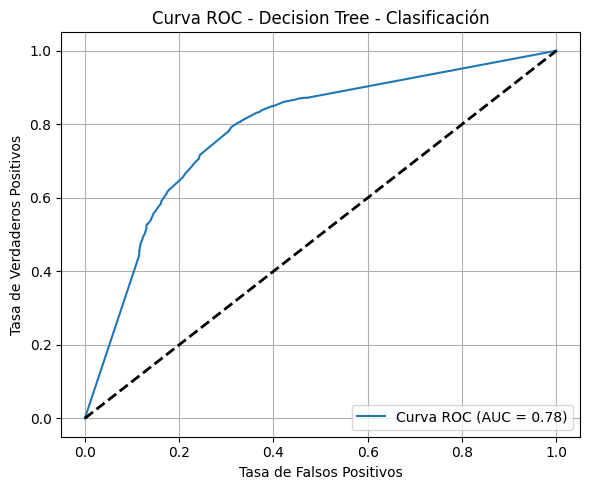

In [10]:
y_prob = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})') # Cambiamos la etiqueta si es necesario
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree - Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

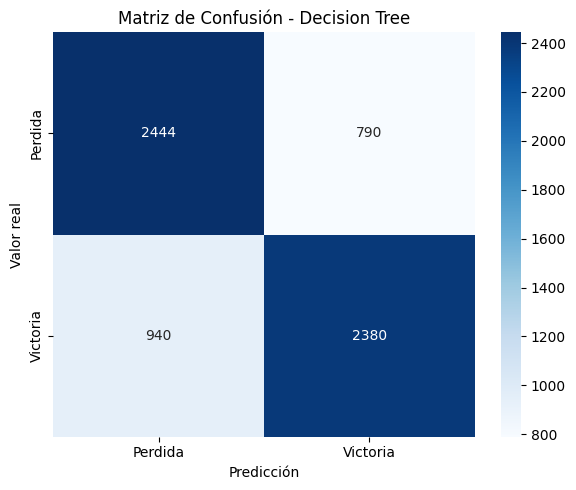

In [9]:
#matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# vizualizacion de la matriz
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perdida', 'Victoria'], yticklabels=['Perdida', 'Victoria'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Decision Tree')
plt.tight_layout()
plt.show()

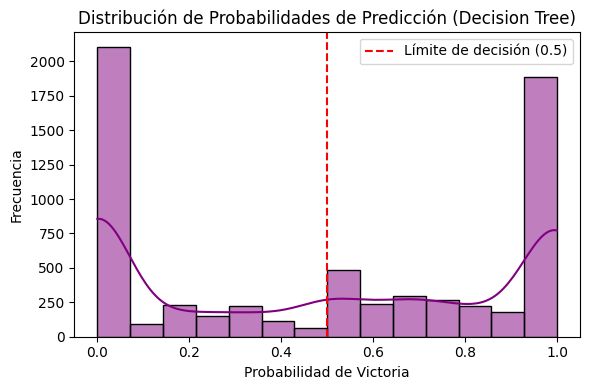

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, kde=True, color='purple') # Usamos y_prob calculada antes
plt.title("Distribución de Probabilidades de Predicción (Decision Tree)")
plt.xlabel("Probabilidad de Victoria")
plt.ylabel("Frecuencia")
plt.axvline(0.5, color='red', linestyle='--', label='Límite de decisión (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

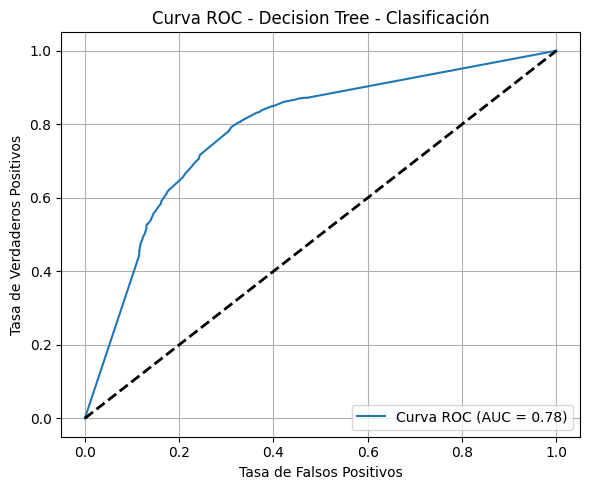

In [13]:
y_prob = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})') # Cambiamos la etiqueta si es necesario
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree - Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()